In [1]:
from yt_xarray.experimental.tiled_grid import YTTiledArbitraryGrid
import yt 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
ds = yt.load_sample("IsolatedGalaxy")

yt : [INFO     ] 2024-07-03 16:17:20,224 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/IsolatedGalaxy/galaxy0030/galaxy0030'
yt : [INFO     ] 2024-07-03 16:17:20,378 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2024-07-03 16:17:20,379 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-07-03 16:17:20,379 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-07-03 16:17:20,380 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-07-03 16:17:20,381 Parameters: cosmological_simulation   = 0


In [3]:
tag = YTTiledArbitraryGrid(
    ds.domain_center - ds.domain_width*0.1, 
    ds.domain_center + ds.domain_width*0.1, 
    (256, 256, 256),
    8,
    ds=ds)

Parsing Hierarchy : 100%|██████████████████| 173/173 [00:00<00:00, 16645.59it/s]
yt : [INFO     ] 2024-07-03 16:17:20,420 Gathering a field list (this may take a moment.)


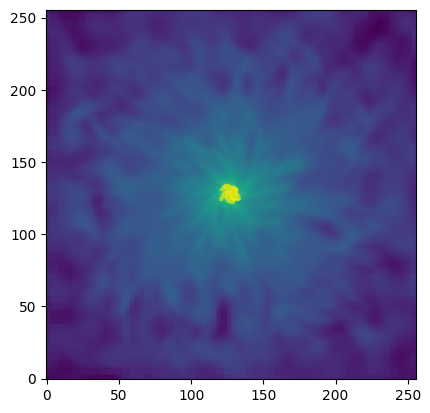

In [4]:
gd = tag.to_numpy(("gas", "density"))
plt.imshow(np.log10(gd[:,:,128]), origin='lower')

In [5]:
ds_xr = tag.to_xarray(("gas", "density"), backend='numpy')
ds_xr

<xarray.DataArray 'gas_density' (x: 256, y: 256, z: 256)>
array([[[4.71922639e-30, 4.71922639e-30, 4.71922639e-30, ...,
         1.13466401e-30, 1.13466401e-30, 1.13466401e-30],
        [4.71922639e-30, 4.71922639e-30, 4.71922639e-30, ...,
         1.13466401e-30, 1.13466401e-30, 1.13466401e-30],
        [4.71922639e-30, 4.71922639e-30, 4.71922639e-30, ...,
         1.13466401e-30, 1.13466401e-30, 1.13466401e-30],
        ...,
        [1.98045131e-30, 1.98045131e-30, 1.98045131e-30, ...,
         2.92383521e-30, 2.92383521e-30, 2.92383521e-30],
        [1.98045131e-30, 1.98045131e-30, 1.98045131e-30, ...,
         2.92383521e-30, 2.92383521e-30, 2.92383521e-30],
        [1.98045131e-30, 1.98045131e-30, 1.98045131e-30, ...,
         2.92383521e-30, 2.92383521e-30, 2.92383521e-30]],

       [[4.71922639e-30, 4.71922639e-30, 4.71922639e-30, ...,
         1.13466401e-30, 1.13466401e-30, 1.13466401e-30],
        [4.71922639e-30, 4.71922639e-30, 4.71922639e-30, ...,
         1.13466401e-30, 1.13466401e-30, 1.13466401e-30],
        [4.71922639e-30, 4.71922639e-30, 4.71922639e-30, ...,
         1.13466401e-30, 1.13466401e-30, 1.13466401e-30],
...
        [2.64880309e-30, 2.64880309e-30, 2.64880309e-30, ...,
         8.12685653e-30, 8.12685653e-30, 8.12685653e-30],
        [2.64880309e-30, 2.64880309e-30, 2.64880309e-30, ...,
         8.12685653e-30, 8.12685653e-30, 8.12685653e-30],
        [2.64880309e-30, 2.64880309e-30, 2.64880309e-30, ...,
         8.12685653e-30, 8.12685653e-30, 8.12685653e-30]],

       [[2.33981574e-30, 2.33981574e-30, 2.33981574e-30, ...,
         1.31108845e-30, 1.31108845e-30, 1.31108845e-30],
        [2.33981574e-30, 2.33981574e-30, 2.33981574e-30, ...,
         1.31108845e-30, 1.31108845e-30, 1.31108845e-30],
        [2.33981574e-30, 2.33981574e-30, 2.33981574e-30, ...,
         1.31108845e-30, 1.31108845e-30, 1.31108845e-30],
        ...,
        [2.64880309e-30, 2.64880309e-30, 2.64880309e-30, ...,
         8.12685653e-30, 8.12685653e-30, 8.12685653e-30],
        [2.64880309e-30, 2.64880309e-30, 2.64880309e-30, ...,
         8.12685653e-30, 8.12685653e-30, 8.12685653e-30],
        [2.64880309e-30, 2.64880309e-30, 2.64880309e-30, ...,
         8.12685653e-30, 8.12685653e-30, 8.12685653e-30]]])
Coordinates:
  * x        (x) float64 0.4004 0.4012 0.402 0.4027 ... 0.598 0.5988 0.5996
  * y        (y) float64 0.4004 0.4012 0.402 0.4027 ... 0.598 0.5988 0.5996
  * z        (z) float64 0.4004 0.4012 0.402 0.4027 ... 0.598 0.5988 0.5996
Attributes:
    ngrids:     8
    fieldname:  ('gas', 'density')

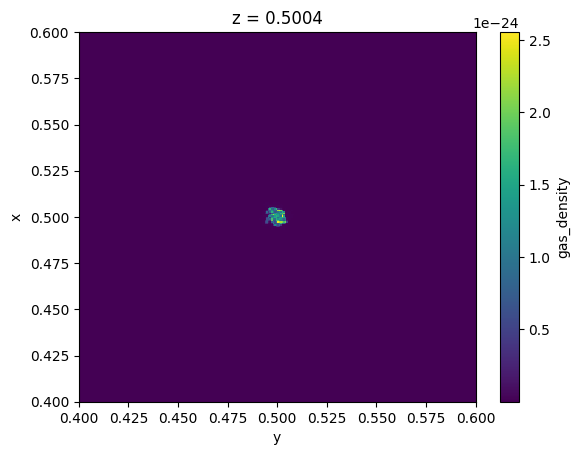

In [6]:
ds_xr.isel({'z':128}).plot()

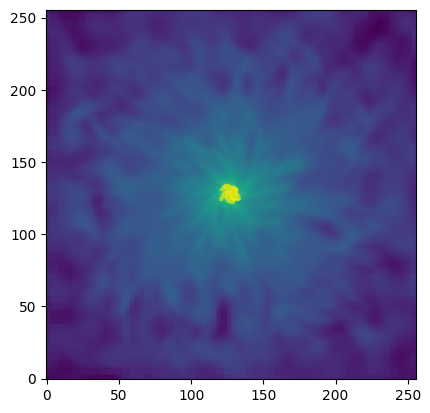

In [7]:
plt.imshow(np.log10(ds_xr.isel({'z':128})), origin='lower')